In [215]:
import numpy as np
import pandas as pd
import sys
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("/Users/clemens/Documents/Code/AnalysisToolbox")

import spikeAnalysisToolsV2.data_loading as data
import spikeAnalysisToolsV2.firing_rates as firing
import spikeAnalysisToolsV2.helper as helper
import spikeAnalysisToolsV2.overviews as overview
import spikeAnalysisToolsV2.plotting as spikeplot

In [216]:
masterpath = "/Users/clemens/Documents/Code/ModelClemens/output"
## set the subfolder to the Simulation you want to analyse 

subfolders = [
    "01_08-19_23_noise2"
    #"01_08-19_17_noise2"
            ]
## if more than the inital epoch is needed *1 needs to be run
extensions = ["initial"] #+ ["testing/epoch80"]
#extensions = ["testing/epoch100"]

object_list = data.load_testing_stimuli_info(masterpath+"/" + subfolders[0]) #assuming all the subfolders have the same
stimuli_names = data.load_testing_stimuli_names(masterpath+"/" + subfolders[0])
n_stimuli = np.sum(obj['count'] for obj in object_list)
object_indices = [obj['indices'] for obj in object_list]

# info_neurons is just an array of the information from above. This makes it easier to run the functions and pass the information. 
# info_times same for times
network_architecture = dict(
    num_exc_neurons_per_layer = 64*64,
    num_inh_neurons_per_layer = 32*32,
    num_layers = 4
)

info_times = dict(
    length_of_stimulus = 2.0,
    num_stimuli = n_stimuli,
    time_start = 1.5,
    time_end = 1.9
)

print(object_list)
print(stimuli_names)

[{'count': 4, 'elements': {'random_0000'}, 'indices': [0, 1, 2, 3]}]
['obj0:random_0000', 'obj0:random_0000', 'obj0:random_0000', 'obj0:random_0000']


In [217]:
spikes = data.load_spikes_from_subfolders(masterpath, subfolders, extensions, True)

Start
01_08-19_23_noise2


In [218]:
max_id = spikes[0][0].ids.max()+1
min_id = spikes[0][0].ids.min()
rates = firing.spikesToFR(spikes[0][0], (min_id, max_id), (0, 2.0))

print("mean: {}".format(np.mean(rates.firing_rates.values)))

mean: 0.5227328216318496


In [219]:
fr_sorted = np.sort(rates.firing_rates.values)[:-5000:-1]
fr_sorted

array([ 82. ,  74. ,  72.5, ...,   4.5,   4.5,   4.5])

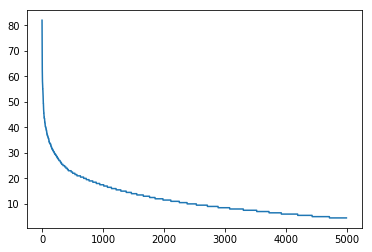

In [220]:
plt.plot(fr_sorted)

(array([  1.27985000e+05,   1.94100000e+03,   7.68000000e+02,
          2.26000000e+02,   9.40000000e+01,   2.90000000e+01,
          1.40000000e+01,   5.00000000e+00,   2.00000000e+00,
          2.00000000e+00]),
 array([  0. ,   8.2,  16.4,  24.6,  32.8,  41. ,  49.2,  57.4,  65.6,
         73.8,  82. ]),
 <a list of 10 Patch objects>)

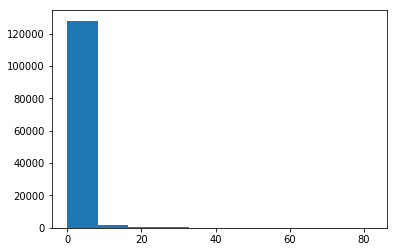

In [221]:
plt.hist(rates.firing_rates.values)